In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv",encoding="utf-8")
df.head()

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1


In [ ]:
df["label"].unique()

array(['2', '1', '0', '20', '11', '-', 'o', '--'], dtype=object)

In [ ]:
df["label"].value_counts()

,count
label,
1,2378
0,2377
2,1236
-,5
20,1
11,1
o,1
--,1


In [ ]:
# Filtering out unwanted labels
unwanted_labels = re.compile(r'^(-|20|11|o|--)$')
df = df[~df['label'].str.match(unwanted_labels)]

In [ ]:
df["label"].unique()

array(['2', '1', '0'], dtype=object)

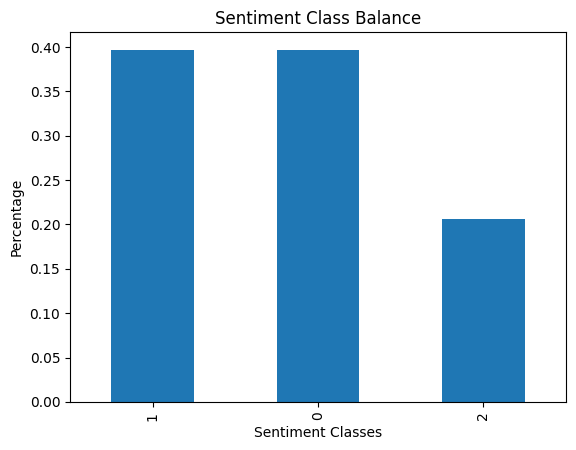

In [ ]:
# Visualizing Class Balance
df["label"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Sentiment Classes")
plt.ylabel("Percentage")
plt.title("Sentiment Class Balance");


In [ ]:
X_train, y_train = df["text"],df["label"]

## Text Preprocessing

In [ ]:
import nltk

In [ ]:
text = X_train[5]
text

'मध्यभोटेकोशिको शेयर ,, कर्मचारी संञ्चयकोष का संञ्चयकर्ताहरुको नाममा परेको शेयर कहिले मेरो शेयरमा देखाउँछ होला ????? प्रष्ट पारिदिनु होला ,'

In [ ]:
def clean_text(text):
    # Remove Links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove emojis and non-alphanumeric characters, Keeping nepali and English
    text = re.sub(r'[^\w\s\u0900-\u097F\u0041-\u005A\u0061-\u007A]', '', text)

    return text.strip()


In [ ]:
X_train = X_train.astype(str).apply(clean_text)
X_train.head()

,text
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...
3,खैँ MBJC प्रति कित्तामा रू10ले बढेर आज रू1100 ...
4,राम्रो भयो


In [ ]:
X_train[0]

'बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्काल प्रोफिट बूकिङ आउने सम्भावना रहेन  भोलि अर्को ट्रेन्ड समात्न सक्ने अबस्था पनि दरो छ'

### Removing Stopwords

In [ ]:
# Removing Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
with open('nepali', 'r', encoding='utf-8-sig') as f:
    nepali_stopwords = [line.strip() for line in f]

In [ ]:
nepali_stopwords[:5]

['छ', 'र', 'पनि', 'छन्', 'लागि']

In [ ]:
english_stopwords = nltk.corpus.stopwords.words('english')
combined_stopwords = nepali_stopwords + english_stopwords

In [ ]:
# Remove stopwords
def remove_stopwords(text,stopword_list):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopword_list]
    return ' '.join(filtered_words)

X_train = X_train.apply(remove_stopwords,args=(combined_stopwords,))
# text = remove_stopwords(text, combined_stopwords)
# text

In [ ]:
X_train[500]

'ऋषि धमला अरुलाइ बोल्न नदिने कस्तो कबाडी ऋषि'

### Tokenization

In [ ]:
from nepalitokenizers import WordPiece

def tokenize(text):

    tokenizer_wp = WordPiece()
    tokens = tokenizer_wp.encode(text)
    return tokens.tokens

X_train = X_train.apply(tokenize)
# print(tokens.ids)
# print(tokens.tokens)

# print(tokenizer_wp.decode(tokens.ids))

In [ ]:
# from transformers import AutoTokenizer

# # Load a multilingual model tokenizer (mBERT or XLM-R)
# tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

# tokens = tokenizer.tokenize(text)

# print(tokens)

['मध्य', '##भ', '##ोट', '##ेको', '##श', '##िक', '##ो', 'श', '##ेय', '##र', 'कर', '##्म', '##चार', '##ी', 'सं', '##ञ', '##्', '##च', '##यक', '##ो', '##ष', 'सं', '##ञ', '##्', '##च', '##यक', '##र', '##्ता', '##हर', '##ुक', '##ो', 'नाम', '##मा', 'पर', '##ेको', 'श', '##ेय', '##र', 'क', '##हिले', 'श', '##ेय', '##र', '##मा', 'देखा', '##उ', '##ँ', '##छ', 'हो', '##ला', 'प', '##्र', '##ष्ट', 'प', '##ार', '##ि', '##द', '##िन', '##ु', 'हो', '##ला']


In [ ]:
X_train.head()

0    [[CLS], बजार, जसरी, ट्रेन्ड, चेन, ##्, ##ज, गर...
1    [[CLS], 100, ##0, अंकले, घटेको, नेप्से, 20, ##...
2    [[CLS], होइन, सानिमा, बैंक, bo, ##nu, ##s, घो,...
3    [[CLS], खै, ##ँ, m, ##b, ##j, ##c, कित्ता, ##म...
4                                  [[CLS], भयो, [SEP]]
Name: text, dtype: object

### TF-IDF Vectorization

In [ ]:
X_train_cleaned = X_train.apply(lambda tokens: [token for token in tokens if token not in ['[CLS]', '[SEP]']])

In [ ]:
X_train_cleaned.head()

0    [बजार, जसरी, ट्रेन्ड, चेन, ##्, ##ज, गर्यो, हे...
1    [100, ##0, अंकले, घटेको, नेप्से, 20, ##0, अंकल...
2    [होइन, सानिमा, बैंक, bo, ##nu, ##s, घो, ##स, #...
3    [खै, ##ँ, m, ##b, ##j, ##c, कित्ता, ##मा, रू, ...
4                                                [भयो]
Name: text, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokenized sentences back to strings
X_train_joined = [' '.join(tokens) for tokens in X_train_cleaned]
vectorizer = TfidfVectorizer(max_features=2500)
vectorized = vectorizer.fit(X_train_joined)
X_train_tfidf = vectorized.transform(X_train_joined)

print(X_train_tfidf.shape)

(5991, 1432)


## Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_train_tfidf)

print("Accuracy:", accuracy_score(y_train, y_pred))

Accuracy: 0.7282590552495409


d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Pipeline for test data

In [ ]:
def clean_text(text):
    # Remove Links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove emojis and non-alphanumeric characters, Keeping nepali and English
    text = re.sub(r'[^\w\s\u0900-\u097F\u0041-\u005A\u0061-\u007A]', '', text)

    return text.strip()

def remove_stopwords(text,stopword_list):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopword_list]
    return ' '.join(filtered_words)

def tokenize(text):
    tokenizer_wp = WordPiece()
    tokens = tokenizer_wp.encode(text)
    return tokens.tokens

df_test = pd.read_csv("test.csv",encoding="utf-8")

unwanted_labels = re.compile(r'^(-|20|11|o|--)$')
df_test = df_test[~df_test['label'].str.match(unwanted_labels)]

#Split
X_test,y_test = df_test["text"], df_test["label"]

X_test = X_test.astype(str).apply(clean_text)

X_test = X_test.apply(remove_stopwords,args=(combined_stopwords,))

X_test = X_test.apply(tokenize)

X_test_cleaned = X_test.apply(lambda tokens: [token for token in tokens if token not in ['[CLS]', '[SEP]']])

# Join tokenized sentences back to strings
X_test_joined = [' '.join(tokens) for tokens in X_test_cleaned]
X_test_tfidf = vectorized.transform(X_test_joined)

In [ ]:
print(X_test_tfidf.shape)

(1994, 1432)


In [ ]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5170511534603811


### Applying Regularization

In [ ]:
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train_tfidf, y_train)

y_pred_train = model.predict(X_train_tfidf)

print("Accuracy:", accuracy_score(y_train, y_pred_train))

y_pred_test = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_test))

Accuracy: 0.7282590552495409
Accuracy: 0.5170511534603811


d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
print("Cross-validation scores:", scores)

print("Mean cross-validation score:", scores.mean())

d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Inte

Cross-validation scores: [0.48040033 0.57846411 0.66777963 0.6293823  0.56176962]
Mean cross-validation score: 0.5835591986087459


d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# NepaBERTa Model

## Data PreProcessing

In [ ]:
# Function to remove URL and emojis
def clean_text(text):
    # Remove Links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove emojis and non-alphanumeric characters, Keeping nepali and English
    text = re.sub(r'[^\w\s\u0900-\u097F\u0041-\u005A\u0061-\u007A]', '', text)

    return text.strip()

# Function to remove Nepali and English Stopwords
def remove_stopwords(text,stopword_list):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopword_list]
    return ' '.join(filtered_words)

# Read train and test Data
df_train = pd.read_csv("train.csv",encoding="utf-8")
df_test = pd.read_csv("test.csv",encoding="utf-8")

# Combine df_train and df_test into same df
df = pd.concat([df_train, df_test], ignore_index=True)

# Removing Unwanted Labeles
unwanted_labels = re.compile(r'^(-|20|11|o|--)$')
df = df[~df['label'].str.match(unwanted_labels)]

# Drop any row with NA values
df.dropna(inplace=True)

# X,y Split
X,y = df["text"], df["label"].astype(int)

# Apply clean_test function
X = X.astype(str).apply(clean_text)

# Apply remove_stopwords Function
X = X.apply(remove_stopwords,args=(combined_stopwords,))


In [ ]:
X

,text
0,बजार जसरी ट्रेन्ड चेन्ज गर्यो हेर्दा प्रोफिट ब...
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...
2,होइन सानिमा बैंक bonus घोसणा २ महिना भयो book ...
3,खैँ MBJC कित्तामा रू10ले बढेर आज रू1100 भयो 10...
4,भयो
...,...
7991,कस्ता कस्ता पागल memory king छन यार नेपालमा
7992,मूर्ख बिजय साही
7993,बिजय शाहीलाई निरुत्साहित पुण्य गौतम जी
7994,यस्ता बिदेशी महादलालीहरु कहाँ गएर प्रश्नको उत्...


In [ ]:
X.values

array(['बजार जसरी ट्रेन्ड चेन्ज गर्यो हेर्दा प्रोफिट बूकिङ आउने सम्भावना रहेन भोलि ट्रेन्ड समात्न सक्ने अबस्था दरो',
       '1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो कुरो होइन किन्ने अवसर है।',
       'होइन सानिमा बैंक bonus घोसणा २ महिना भयो book close अहिले खातामा आउदैन ब्याज दिने योजना रहेछ क्या',
       ..., 'बिजय शाहीलाई निरुत्साहित पुण्य गौतम जी',
       'यस्ता बिदेशी महादलालीहरु कहाँ गएर प्रश्नको उत्तर खोज्नुनै दुर्भाग्या हो।',
       'बुढा खालहरूमा बाँकि नेताहरुमा बाबुराम जतिको उदारबादि सक्षम अरू भो।'],
      dtype=object)

In [ ]:
y.values

array(['2', '1', '2', ..., '0', '0', '0'], dtype=object)

### Tokenization

In [ ]:
from transformers import AutoTokenizer

# AutoTokenizer to automatically select the appropriate tokenizer for a given pre-trained model
tokenizer = AutoTokenizer.from_pretrained("NepBERTa/NepBERTa")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/652 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/547k [00:00<?, ?B/s]

In [ ]:
import torch

In [ ]:
# Tokenize the text data
inputs = tokenizer(
    X.tolist(),              # Converts X into a Python list of strings, making it compatible with the tokenizer.
    max_length=128,          # Adjusted based on the average length of the text
    padding="max_length",    # Pads sequences shorter than 128 tokens with special padding tokens ([PAD]) to make all sequences the same length.
    truncation=True,         # Truncates sequences longer than 128 tokens to avoid exceeding the maximum input length.
    return_tensors="pt"      # Returns the tokenized data as PyTorch tensors. These tensors are needed for input into transformer models.
)

# Convert labels to tensors
labels = torch.tensor(y.tolist())   #  Converts the list into a PyTorch tensor, which is required for model training and evaluation.

### Preparing input dataset as required by the Model

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create a TensorDataset. It combines multiple tensors (of the same length) into a single dataset.
dataset = TensorDataset(
    inputs['input_ids'],        # Tokenized input text.
    inputs['attention_mask'],   # Indicates padding vs. actual tokens.
    labels                      # Target labels
)

# Extract features and labels from the TensorDataset
features = torch.cat(
    [dataset[i][0].unsqueeze(0) for i in range(len(dataset))]   # Concatenates the list of tensors along the first dimension to form a single 2D tensor.
)

attention_masks = torch.cat(
    [dataset[i][1].unsqueeze(0) for i in range(len(dataset))]   # Extract attention masks
)

labels = torch.cat(
    [dataset[i][2].unsqueeze(0) for i in range(len(dataset))]   # Extract labels
)


#### Stratified Split as data for class 2 is unbalanced

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize stratified splitter for train/test split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

# Perform the split
for train_idx, test_idx in splitter.split(features, labels):
    X_train, X_test = features[train_idx], features[test_idx]
    mask_train, mask_test = attention_masks[train_idx], attention_masks[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]


In [ ]:
# Initialize stratified splitter for train/val split
splitter_val = StratifiedShuffleSplit(n_splits=1, test_size=0.1765, random_state=42)  # 15% of total for val

for train_idx, val_idx in splitter_val.split(X_train, y_train):
    X_train_final, X_val = X_train[train_idx], X_train[val_idx]
    mask_train_final, mask_val = mask_train[train_idx], mask_train[val_idx]
    y_train_final, y_val = y_train[train_idx], y_train[val_idx]


In [ ]:
# Wrap splits into TensorDatasets
train_dataset = TensorDataset(X_train_final, mask_train_final, y_train_final)
val_dataset = TensorDataset(X_val, mask_val, y_val)
test_dataset = TensorDataset(X_test, mask_test, y_test)

# Create DataLoaders for batching
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


## MODEL Training

In [ ]:
from transformers import AutoModelForSequenceClassification, AdamW

# Load NepBERTa model for classification
model = AutoModelForSequenceClassification.from_pretrained("NepBERTa/NepBERTa", num_labels=3, from_tf = True)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

tf_model.h5:   0%|          | 0.00/534M [00:00<?, ?B/s]

All TF 2.0 model weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# Optimizer

# model.parameters() specifies which parameters of the model the optimizer should update.
# It is a generator that returns all trainable parameters of the model.
# A smaller learning rate (e.g., 2e-5) is common for fine-tuning pre-trained models like transformers.
optimizer = AdamW(model.parameters(), lr=2e-5)


# Loss function
# CrossEntropyLoss is a commonly used loss function for multi-class problems
# It combines Softmax and Negative Log-Likelihood
loss_fn = torch.nn.CrossEntropyLoss()



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm import tqdm   # Provides a progress bar for loops and other iterable operations.

In [ ]:
def train_epoch(model, train_loader, optimizer, loss_fn, device):

    model.train()  # Set model to training mode
    total_loss = 0 # Initialize a variable to track the total loss for this epoch

    # Loop through each batch of data from the training DataLoader
    for batch in tqdm(train_loader):

        # Move input_ids, attention_masks, and labels to the specified device (CPU/GPU)
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_masks)

        # Extract logits (raw output values) from the model's output
        logits = outputs.logits

        # Compute the loss using the loss function and the true labels
        loss = loss_fn(logits, labels)

        # Accumulate the loss value for this batch (convert tensor to Python scalar)
        total_loss += loss.item()

        # Zero out the gradients from the previous batch (important to avoid accumulation)
        optimizer.zero_grad()

        # Perform backpropagation to compute gradients of the loss w.r.t model parameters
        loss.backward()

        # Update the model's parameters using the optimizer
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    return avg_loss

In [ ]:
def validate_epoch(model, val_loader, loss_fn, device):

    # Set the model to evaluation mode (disables dropout and other training-specific layers)
    model.eval()

    # Initialize variables to track total loss, correct predictions, and total examples
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():   # Prevents the computation of gradients, making evaluation faster and memory-efficient.

        # Loop through each batch of data from the validation DataLoader
        for batch in val_loader:

            # Move input_ids, attention_masks, and labels to the specified device (CPU/GPU)
            input_ids, attention_masks, labels = [b.to(device) for b in batch]

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_masks)
            logits = outputs.logits

            # Compute loss
            loss = loss_fn(logits, labels)
            total_loss += loss.item()

            # Compute accuracy
            preds = torch.argmax(logits, dim=1)       # Compute the predicted class for each example (index with the highest logit value)
            correct += (preds == labels).sum().item() # Count the number of correct predictions
            total += labels.size(0)                   # Update the total number of examples processed

    avg_loss = total_loss / len(val_loader)
    accuracy = correct / total
    return avg_loss, accuracy


In [ ]:
# Training parameters
epochs = 3
best_val_accuracy = 0

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    train_loss = train_epoch(model, train_loader, optimizer, loss_fn, device)
    val_loss, val_accuracy = validate_epoch(model, val_loader, loss_fn, device)

    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Save the best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), "nepaberta_best_model.pth")
        print("Model saved.")


Epoch 1/3


100%|██████████| 175/175 [01:40<00:00,  1.75it/s]


Train Loss: 0.3070, Validation Loss: 0.9219, Validation Accuracy: 0.7087
Model saved.
Epoch 2/3


100%|██████████| 175/175 [01:42<00:00,  1.70it/s]


Train Loss: 0.2494, Validation Loss: 1.0231, Validation Accuracy: 0.7045
Epoch 3/3


100%|██████████| 175/175 [01:44<00:00,  1.68it/s]


Train Loss: 0.2265, Validation Loss: 0.9753, Validation Accuracy: 0.7237
Model saved.


In [ ]:
def test_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_masks, labels = [b.to(device) for b in batch]

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_masks)
            logits = outputs.logits

            # Compute accuracy
            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy

#### Epoch 5 model

In [ ]:
# Load the best model
model.load_state_dict(torch.load("nepaberta_best_model.pth"))
model.to(device)

# Test the model
test_accuracy = test_model(model, test_loader, device)


<ipython-input-21-9e8c5d6ed266>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("nepaberta_best_model.pth"))


Test Accuracy: 0.7304


#### Epoch 3 model

In [ ]:
model.load_state_dict(torch.load("nepaberta_best_model.pth"))
model.to(device)
test_accuracy = test_model(model, test_loader, device)

<ipython-input-23-2b87f018191c>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("nepaberta_best_model.pth"))


Test Accuracy: 0.7254
